# The Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr2911.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
 
ASBG10A	GEN\AGREE\BEING IN SCHOOL\
ASBG10B	GEN\AGREE\SAFE AT SCHOOL\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\

# Literacy Test Scores

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [6]:
# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [7]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [8]:
df_literacy = df[identifier_columns+averages]

In [9]:
pivot_literacy = df_literacy.pivot_table(values=averages, index=identifier_columns, aggfunc='mean')

## Literacy Bar chart

In [ ]:
df_foreign_born = pivot_literacy[pivot_literacy['ASBH02A']=='No'].drop('ASBH02A', axis=1).melt(id_vars='Country', var_name='Metric', value_name='Value')

In [ ]:
df_native_born = pivot_literacy[pivot_literacy['ASBH02A']=='Yes'].drop('ASBH02A', axis=1).melt(id_vars='Country', var_name='Metric', value_name='Value')

In [ ]:
# Define bar width
bar_width = 1
n_metrics = df_foreign_born['Metric'].nunique()

# Colors for each metric
colors = {
    'informational_purpose_avg': 'red',
    'interpreting_process_avg': 'blue',
    'literary_purpose_avg': 'green',
    'reading_avg': 'orange',
    'straightforward_process_avg': 'purple'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Get unique countries and metrics
countries = df_foreign_born['Country'].unique()
metrics = df_foreign_born['Metric'].unique()

# Create x indices for each group of bars
indices = np.arange(len(countries)) * (n_metrics + 1)

# Plot each group of bars for 'yes' and 'no'
for i, metric in enumerate(metrics):
    yes_values = df_native_born[df_native_born['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    no_values = df_foreign_born[df_foreign_born['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    
    color = colors[metric]
    ax.bar(indices + i * bar_width, yes_values, bar_width, color=color, alpha=0.6)
    ax.bar(indices + i * bar_width, no_values, bar_width, color=color, alpha=1.0)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Overlapping Bar Chart by Metric and Country')

# Set x-ticks and x-tick labels
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=metric) for metric, color in colors.items()]
ax.legend(handles=legend_handles, title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.tight_layout()
plt.show()

## Literacy Heat Map

In [ ]:
# Calculate the total average for each row
pivot_literacy['MeanTotal'] = pivot_literacy[averages].mean(axis=1)

I want to make the below a function so that the variables 'country_avgs' and sorted_index only have values within the function. 

In [ ]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=True)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [ ]:
# Sort countries by the total average of MeanTotal
country_averages = (
    pivot_literacy.groupby('Country')['MeanTotal']
    .mean()
    .sort_values(ascending=True)
    .index.tolist()
)

# Define a custom order for the 'ASBH02A' column
asbh02a_sorter = ['Yes', 'No']

# Create a custom sorting order for the index
sorted_index = (
    pivot_literacy.index.to_frame()
    .rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})
    .assign(
        Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
        ASBH02A_=lambda df: pd.Categorical(df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
    )
    .sort_values(by=['Country_', 'ASBH02A_'])
    .index
)

# Apply the sorted index to the pivot table
sorted_pivot_literacy = pivot_literacy.loc[sorted_index]

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_literacy, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

In [17]:
# Create a contingency table
contingency_literacy = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['literacyavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='literacyavg_binned',
        value_name='count'
    )
)


## Literacy Average Distribution

In [10]:
df["literacyavg"] = df[averages].mean(axis=1)

In [11]:
df['literacyavg_binned'] = pd.cut(df['literacyavg'], bins=10)

In [12]:
# Create a contingency table
contingency_literacy = pd.crosstab(
    index = [df['ASBH02A'], df['Country']],
    columns = df['literacyavg_binned']
).reset_index()
.melt(
    id_vars=['ASBH02A','Country'],
    var_name='literacyavg_binned',
    value_name='count')

### Separated functions

In [13]:
def filter_and_prepare_data(data, filter_column, filter_value, drop_column=None):
    """
    Filters the data based on a column value and optionally drops a column.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, the column to filter on.
    - filter_value: str, the value to filter by.
    - drop_column: str, optional, a column to drop after filtering.
    
    Returns:
    - pd.DataFrame, the filtered and optionally cleaned data.
    """
    filtered_data = data[data[filter_column] == filter_value]
    if drop_column and drop_column in filtered_data.columns:
        filtered_data = filtered_data.drop(drop_column, axis=1)
    return filtered_data

In [14]:
def create_pivot_table(data, index_col, column_col, value_col):
    """
    Creates a pivot table from the filtered data.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    
    Returns:
    - pd.DataFrame, the pivot table.
    """
    return data.pivot(index=index_col, columns=column_col, values=value_col)

In [15]:
def normalize_to_percentages(pivot_table):
    """
    Normalizes pivot table values to percentages.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table with a "total" column.
    
    Returns:
    - pd.DataFrame, the pivot table normalized to percentages.
    """
    pivot_table["total"] = pivot_table.sum(axis=1)
    total_column = pivot_table["total"]
    normalized_table = pivot_table.div(total_column, axis=0) * 100
    return normalized_table.drop("total", axis=1)

In [16]:
def melt_and_format_data(pivot_table, id_col, melt_col, value_name):
    """
    Converts a pivot table to a melted format and formats categorical bins.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table.
    - id_col: str, column to use as the identifier in the melted table.
    - melt_col: str, the column to melt (e.g., a column from the pivot table).
    - value_name: str, name for the values in the melted table.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the melted and formatted data.
    """
    melted = pivot_table.reset_index().melt(id_vars=id_col, var_name=melt_col, value_name=value_name)
    return melted


In [17]:
def generate_heatmap(data, filter_column, filter_value, index_col, column_col, value_col):
    """
    Generates a heatmap from the data based on filtering, pivoting, and normalizing steps.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, column to filter on.
    - filter_value: str, value to filter by.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the final heatmap as a pivot table.
    """
    filtered_data = filter_and_prepare_data(data, filter_column, filter_value, drop_column=filter_column)
    pivot_table = create_pivot_table(filtered_data, index_col=index_col, column_col=column_col, value_col=value_col)
    normalized_table = normalize_to_percentages(pivot_table)
    melted_data = melt_and_format_data(
        normalized_table, id_col=index_col, melt_col=column_col, value_name="percentage"
    )
    heatmap = melted_data.pivot(index=column_col, columns=index_col, values="percentage")
    return heatmap


In [18]:
heatmap_literacy_native_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='Yes',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

heatmap_literacy_foreign_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='No',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

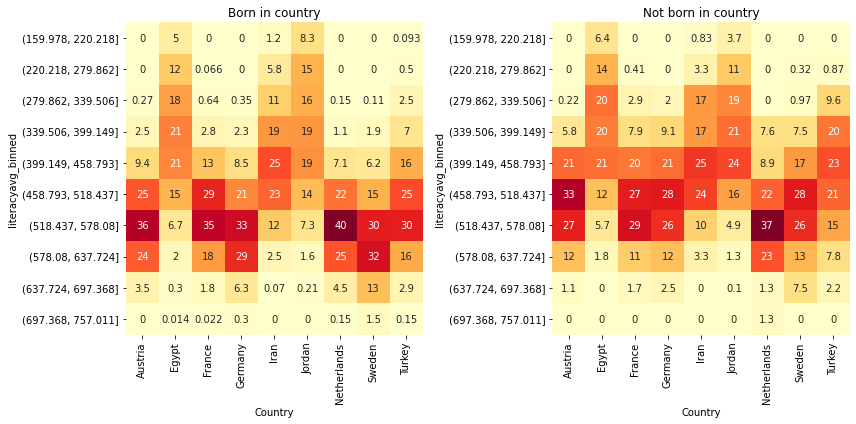

In [19]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_literacy_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_literacy_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data = heatmap_literacy_native_born - heatmap_literacy_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Literacy Minimum age of arrival

In [ ]:
pivot_minage_literacy = df.pivot_table(values='literacyavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [ ]:
mean_scores_literacy = (
        pivot_minage_literacy.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_literacy, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Feelings in School

## Feelings Heat Map

In [ ]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [ ]:
pivot_feelings = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean')

In [ ]:
# Calculate the mean of positive feelings and add it as a new column
pivot_feelings['MeanTotal'] = pivot_feelings[positive_feelings_in_school].mean(axis=1)

# Sort countries by the total average of MeanTotal
country_averages = (
    pivot_feelings.groupby('Country')['MeanTotal']
    .mean()
    .sort_values(ascending=True)
    .index.tolist()
)

# Define a custom order for the 'ASBH02A' column
asbh02a_sorter = ['Yes', 'No']

# Create a custom sorting order for the index
sorted_index = (
    pivot_feelings.index.to_frame()
    .rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})
    .assign(
        Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
        ASBH02A_=lambda df: pd.Categorical(df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
    )
    .sort_values(by=['Country_', 'ASBH02A_'])
    .index
)

# Apply the sorted index to the pivot table
sorted_pivot_feelings = pivot_feelings.loc[sorted_index]


In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

## Feelings Average Distribution

In [ ]:
df['feelingsavg'] = df[positive_feelings_in_school].mean(axis=1)

In [ ]:
df['feelingsavg_binned'] = pd.cut(df['feelingsavg'], bins=10)

In [ ]:
# Create a contingency table
contingency_feelings = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['feelingsavg_binned'])

In [ ]:
# Convert the contingency table to a format suitable for Plotly
contingency_feelings_reset = contingency_feelings.reset_index()
contingency_feelings_melted = contingency_feelings_reset.melt(id_vars=['ASBH02A','Country'], var_name='feelingsavg_binned', value_name='count')
# Convert Interval objects to strings
contingency_feelings_melted['feelingsavg_binned'] = contingency_feelings_melted['feelingsavg_binned'].astype(str)

In [ ]:
df_yes = contingency_feelings_melted[contingency_feelings_melted['ASBH02A'] == 'Yes']

In [ ]:
heatmap_yes = df_yes.pivot(index='Country',columns="feelingsavg_binned",values = "count")

In [ ]:
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='feelingsavg_binned', value_name='percentage')

In [ ]:
# Convert Interval objects to strings
df_percentage__yes_melted['feelingsavg_binned'] = df_percentage__yes_melted['feelingsavg_binned'].astype(str)

In [ ]:
# Convert feelingsavg_binned to categorical with the specified order
df_percentage__yes_melted['feelingsavg_binned'] = pd.Categorical(df_percentage__yes_melted['feelingsavg_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

In [ ]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "feelingsavg_binned", columns = "Country", values = "percentage")

In [ ]:
df_no = contingency_feelings_melted[contingency_feelings_melted['ASBH02A'] == 'No']
df_no= df_no.drop('ASBH02A', axis=1)
heatmap_no = df_no.pivot(index='Country',columns="feelingsavg_binned",values = "count")

In [ ]:
heatmap_no["total"] = heatmap_no.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_no = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_no = heatmap_no.div(total_column_no, axis=0) * 100
df_percentage_no = df_percentage_no.drop("total", axis=1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_no_reset = df_percentage_no.reset_index()
df_percentage_no_melted = df_percentage_no_reset.melt(id_vars='Country', var_name='feelingsavg_binned', value_name='percentage')


In [ ]:
# Convert Interval objects to strings
df_percentage_no_melted['feelingsavg_binned'] = df_percentage_no_melted['feelingsavg_binned'].astype(str)

# Convert feelingsavg_binned to categorical with the specified order
# Convert feelingsavg_binned to categorical with the specified order
df_percentage_no_melted['feelingsavg_binned'] = pd.Categorical(df_percentage_no_melted['feelingsavg_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

heatmap_percent_no = df_percentage_no_melted.pivot(index="feelingsavg_binned", columns="Country", values="percentage")


In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [ ]:
pivot_minage_feelings = df.pivot_table(values='feelingsavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [ ]:
pivot_minage_feelings

In [ ]:
mean_scores_feelings = (
        pivot_minage_feelings.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Experience in School

## Experience in School Heatmap

In [ ]:
df_experience = df[identifier_columns+negativeexperience_in_school_columns]

In [ ]:
pivot_experience = df_experience.pivot_table(values=negativeexperience_in_school_columns, index=identifier_columns, aggfunc='mean')

In [ ]:
# Calculate the total average for each row
pivot_experience['MeanTotal'] = pivot_experience[['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_experience.groupby('Country')['MeanTotal'].mean().sort_values(ascending=False).index.tolist()

### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [ ]:
# Get the current index as a DataFrame for sorting
index_experience = pivot_experience.index.to_frame()

In [ ]:
# Rename the columns to avoid conflict
index_experience = index_experience.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_experience['Country_'] = pd.Categorical(index_experience['Country_'], categories=country_averages, ordered=True)
index_experience['ASBH02A_'] = pd.Categorical(index_experience['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_experience = index_experience.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_experience.loc[index_experience.index]

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\

darker colours are better

## Experience Average Distribution

In [ ]:
df['experienceavg'] = df[negativeexperience_in_school_columns].mean(axis=1)

In [ ]:
df['experienceavg_binned'] = pd.cut(df['experienceavg'], bins=10)

In [ ]:
# Create a contingency table
contingency_experience = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['experienceavg_binned'])

In [ ]:
# Convert the contingency table to a format suitable for plotting
contingency_experience_melted = contingency_experience.reset_index().melt(id_vars=['ASBH02A','Country'], var_name='experienceavg_binned', value_name='count')
# Convert Interval objects to strings
contingency_experience_melted['experienceavg_binned'] = contingency_experience_melted['experienceavg_binned'].astype(str)

### Separated functions

In [ ]:
def filter_and_prepare_data(data, filter_column, filter_value, drop_column=None):
    """
    Filters the data based on a column value and optionally drops a column.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, the column to filter on.
    - filter_value: str, the value to filter by.
    - drop_column: str, optional, a column to drop after filtering.
    
    Returns:
    - pd.DataFrame, the filtered and optionally cleaned data.
    """
    filtered_data = data[data[filter_column] == filter_value]
    if drop_column and drop_column in filtered_data.columns:
        filtered_data = filtered_data.drop(drop_column, axis=1)
    return filtered_data

In [ ]:
def create_pivot_table(data, index_col, column_col, value_col):
    """
    Creates a pivot table from the filtered data.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    
    Returns:
    - pd.DataFrame, the pivot table.
    """
    return data.pivot(index=index_col, columns=column_col, values=value_col)

In [ ]:
def normalize_to_percentages(pivot_table):
    """
    Normalizes pivot table values to percentages.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table with a "total" column.
    
    Returns:
    - pd.DataFrame, the pivot table normalized to percentages.
    """
    pivot_table["total"] = pivot_table.sum(axis=1)
    total_column = pivot_table["total"]
    normalized_table = pivot_table.div(total_column, axis=0) * 100
    return normalized_table.drop("total", axis=1)

In [ ]:
def melt_and_format_data(pivot_table, id_col, melt_col, value_name):
    """
    Converts a pivot table to a melted format and formats categorical bins.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table.
    - id_col: str, column to use as the identifier in the melted table.
    - melt_col: str, the column to melt (e.g., a column from the pivot table).
    - value_name: str, name for the values in the melted table.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the melted and formatted data.
    """
    melted = pivot_table.reset_index().melt(id_vars=id_col, var_name=melt_col, value_name=value_name)
    return melted


In [ ]:
def generate_heatmap(data, filter_column, filter_value, index_col, column_col, value_col):
    """
    Generates a heatmap from the data based on filtering, pivoting, and normalizing steps.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, column to filter on.
    - filter_value: str, value to filter by.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the final heatmap as a pivot table.
    """
    filtered_data = filter_and_prepare_data(data, filter_column, filter_value, drop_column=filter_column)
    pivot_table = create_pivot_table(filtered_data, index_col=index_col, column_col=column_col, value_col=value_col)
    normalized_table = normalize_to_percentages(pivot_table)
    melted_data = melt_and_format_data(
        normalized_table, id_col=index_col, melt_col=column_col, value_name="percentage"
    )
    heatmap = melted_data.pivot(index=column_col, columns=index_col, values="percentage")
    return heatmap


In [ ]:
heatmap_experience_native_born = generate_heatmap(
    data=contingency_experience_melted,
    filter_column='ASBH02A',
    filter_value='Yes',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

heatmap_experience_foreign_born = generate_heatmap(
    data=contingency_experience_melted,
    filter_column='ASBH02A',
    filter_value='No',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

#### Plotting

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_experience_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_experience_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data = heatmap_experience_native_born - heatmap_experience_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [ ]:
pivot_minage_experience = df.pivot_table(values='experienceavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [ ]:
pivot_minage_experience

In [ ]:
mean_scores_test = (
        pivot_minage_experience.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_test, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

Next steps - comparisons with bench marks - through line? 
Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant